In [35]:
# Libraries Used

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [36]:
df = pd.read_csv("Bank Customer Churn Prediction.csv",sep="," , header=0)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## ***Understand the Data***

In [37]:
# a pandas dataframe for missing_values and duplicates and data types and  unique values because it makes it more cleaner for me

missing_values = df.isnull().sum()
duplicated = df.duplicated().sum()
data_types = df.dtypes
unique_values = df.nunique()

columns = pd.DataFrame({
    "missing_values ":missing_values,
    "duplicated ":duplicated,
    "data_types ":data_types,
    "unique_values ":unique_values
    
})

columns

,missing_values,duplicated,data_types,unique_values
customer_id,0,0,int64,10000
credit_score,0,0,int64,460
country,0,0,object,3
gender,0,0,object,2
age,0,0,int64,70
tenure,0,0,int64,11
balance,0,0,float64,6382
products_number,0,0,int64,4
credit_card,0,0,int64,2
active_member,0,0,int64,2


In [38]:
df.describe()



,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [39]:
# quering using pandas .query
male_churned  = df.query("gender == 'Male' and churn == 1")
male_non_churned = df.query("gender == 'Male' and churn == 0")
female_churned  = df.query("gender == 'Female' and churn == 1")
female_non_churned = df.query("gender == 'Female' and churn == 0")

In [40]:

male_churn_rate = len(male_churned) / len(df.query("gender == 'Male'"))
female_churn_rate = len(female_churned) / len(df.query("gender == 'Female'"))

print("Churn Rate - Male:", male_churn_rate)
print("Churn Rate - Female:", female_churn_rate)



Churn Rate - Male: 0.16455928165658787
Churn Rate - Female: 0.2507153863086066


# ***EDA***

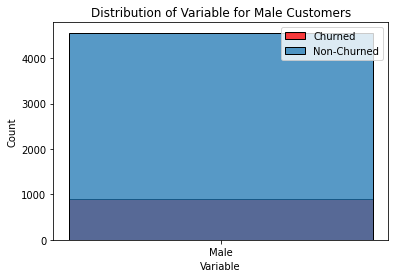

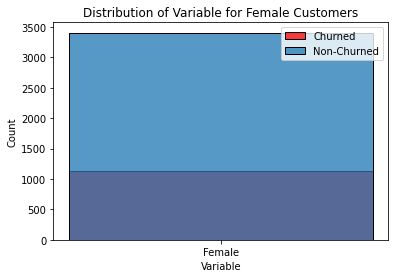

In [41]:
sns.histplot(male_churned['gender'], label='Churned', color='red')
sns.histplot(male_non_churned['gender'], label='Non-Churned')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Distribution of Variable for Male Customers')
plt.legend()
plt.show()


sns.histplot(female_churned['gender'], label='Churned', color='red')
sns.histplot(female_non_churned['gender'], label='Non-Churned')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Distribution of Variable for Female Customers')
plt.legend()
plt.show()

In [42]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***Feature Engineering***

In [43]:
df_new = pd.get_dummies(df['country'])
df1 = pd.concat([df, df_new], axis=1)

In [44]:
df1.drop(columns=['country'],inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df1['gender'] = encoder.fit_transform(df1['gender']) 

In [46]:
df1
#df1.describe

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


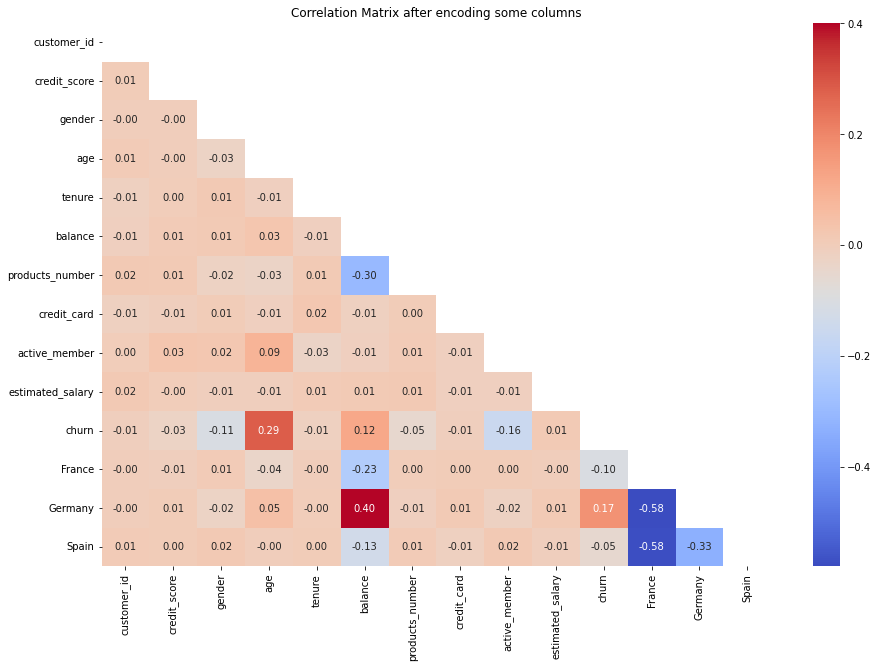

In [47]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Generate a mask for the upper triangular portion
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


# Create the heatmap with the masked portion
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

plt.title('Correlation Matrix after encoding some columns')
# Show the plot
plt.show()

### ***Not that many outliers so we can move ahead***

In [48]:
df1.columns

Index(['customer_id', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'France', 'Germany', 'Spain'],
      dtype='object')

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = ['credit_score','balance','estimated_salary']

df1[cols] = scaler.fit_transform(df1[cols])


In [50]:
df1.drop(columns=['customer_id','age'],inplace=True)

In [51]:
#df1.head()
df1.columns

Index(['credit_score', 'gender', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn', 'France',
       'Germany', 'Spain'],
      dtype='object')

In [52]:

print(df1.dtypes)

credit_score        float64
gender                int32
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
France                 bool
Germany                bool
Spain                  bool
dtype: object


In [53]:
proc_df=df1.copy()

In [54]:
proc_df[proc_df.select_dtypes(include='bool').columns]=proc_df.select_dtypes(include='bool')*1

In [55]:
print(proc_df.dtypes)

credit_score        float64
gender                int32
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
France                int32
Germany               int32
Spain                 int32
dtype: object


In [56]:
proc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  float64
 1   gender            10000 non-null  int32  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
 9   France            10000 non-null  int32  
 10  Germany           10000 non-null  int32  
 11  Spain             10000 non-null  int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 781.4 KB


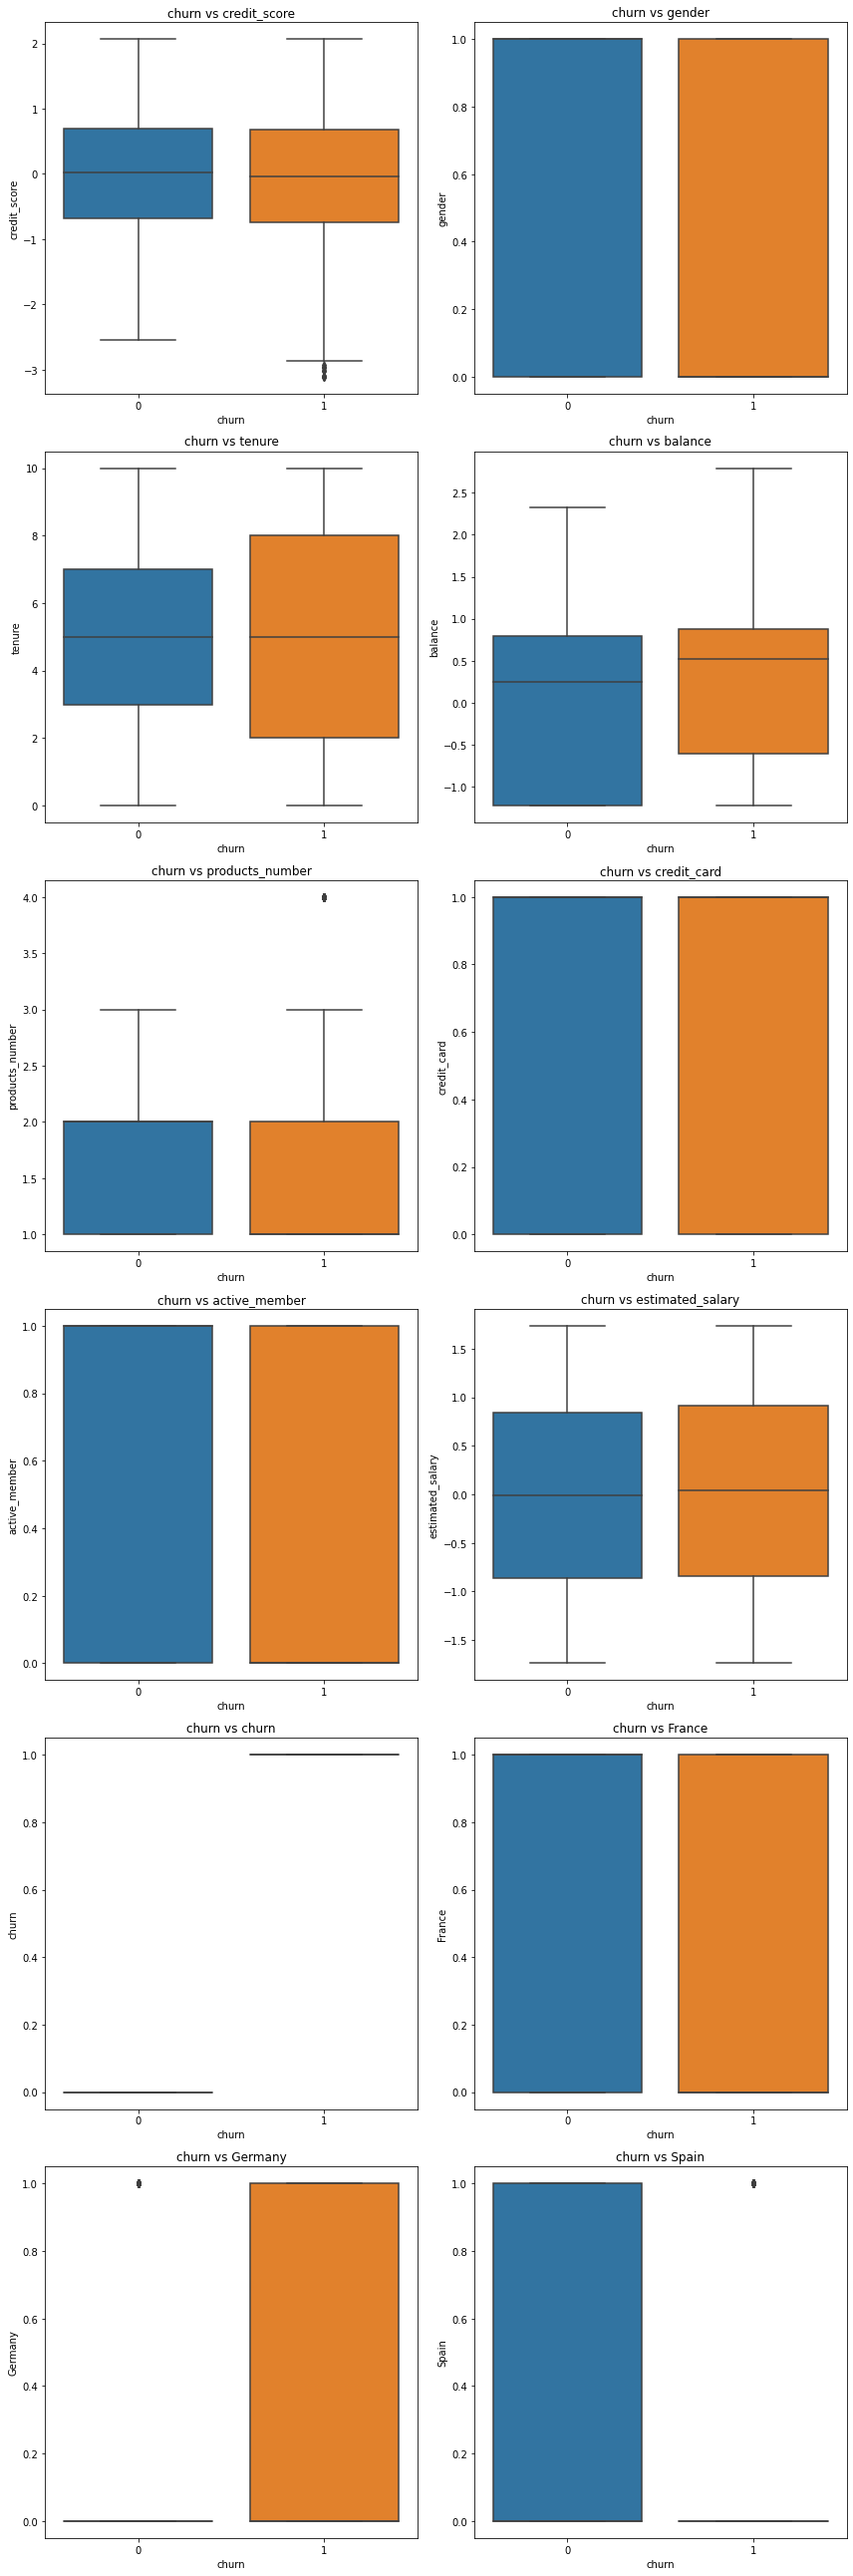

In [57]:
num_columns = proc_df.shape[1]
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*6))
axes = axes.flatten()

for i, column in enumerate(proc_df.columns):
    ax = axes[i]
    sns.boxplot(x=proc_df['churn'], y=proc_df[column], ax=ax)
    ax.set_title(f'churn vs {column}')

plt.tight_layout()
plt.show()

# ***Model Training and using pytorch***

In [58]:
X = proc_df.drop(columns=['churn'])
y = proc_df['churn']

print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [59]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

X_train_tensor = torch.tensor(X_train.values)
X_test_tensor = torch.tensor(X_test.values)
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)


print(X_train_tensor.shape)
print(X_test_tensor.shape)

print(y_train_tensor.shape)
print(y_test_tensor.shape)
print(X_train_tensor.dtype)

torch.Size([8000, 11])
torch.Size([2000, 11])
torch.Size([8000])
torch.Size([2000])
torch.float64


In [60]:
class Ann(nn.Module):
    def __init__(self, input_size=11, hidden1=32, hidden2=16, hidden3=8, output=2):
        super(Ann, self).__init__()
        self.f1 = nn.Linear(input_size, hidden1)
        self.f2 = nn.Linear(hidden1, hidden2)
        self.f3 = nn.Linear(hidden2, hidden3)
        self.output = nn.Linear(hidden3, output)
            
    def forward(self, x):
        x = F.relu(self.f1(x))
        x = F.relu(self.f2(x))
        x = F.relu(self.f3(x))
        x = self.output(x)
        return x

In [61]:
model = Ann(input_size=11, hidden1=32, hidden2=16, hidden3=8, output=2)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [63]:
epochs = range(1000, 3000)
final_loss = []

for i in epochs:
    X_train_tensor = X_train_tensor.float()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    final_loss.append(loss.item())

    if i % 10 == 0:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))

    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch number: 1000 and the loss: 0.5926114320755005
Epoch number: 1010 and the loss: 0.5634332895278931
Epoch number: 1020 and the loss: 0.5363763570785522
Epoch number: 1030 and the loss: 0.5169637799263
Epoch number: 1040 and the loss: 0.5040329098701477
Epoch number: 1050 and the loss: 0.5001246929168701
Epoch number: 1060 and the loss: 0.4974803030490875
Epoch number: 1070 and the loss: 0.4938957691192627
Epoch number: 1080 and the loss: 0.49108561873435974
Epoch number: 1090 and the loss: 0.4884323179721832
Epoch number: 1100 and the loss: 0.4857686460018158
Epoch number: 1110 and the loss: 0.4827987849712372
Epoch number: 1120 and the loss: 0.47972702980041504
Epoch number: 1130 and the loss: 0.47668102383613586
Epoch number: 1140 and the loss: 0.47410377860069275
Epoch number: 1150 and the loss: 0.4721142649650574
Epoch number: 1160 and the loss: 0.47045406699180603
Epoch number: 1170 and the loss: 0.4686563313007355
Epoch number: 1180 and the loss: 0.4661497175693512
Epoch numb

### ***Further we do the predictions using the test data and check the same***

In [64]:
predictions = []
with torch.no_grad():
    X_test_tensor = X_test_tensor.float()
    for data in X_test_tensor:
        y_pred = model.forward(data)
        predicted_class = torch.argmax(y_pred).item()
        predictions.append(predicted_class)
        
predictions[0:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [65]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test_tensor,predictions)
cm

array([[1489,  118],
       [ 250,  143]], dtype=int64)

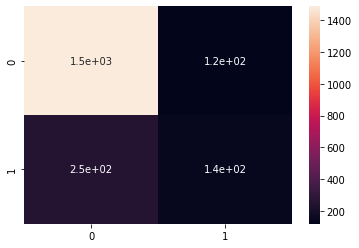

In [66]:
sns.heatmap(cm,annot=True)
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_tensor, predictions)

0.816

In [68]:
from sklearn.metrics import classification_report
report = classification_report(y_test_tensor, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
           1       0.55      0.36      0.44       393

    accuracy                           0.82      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.80      0.82      0.80      2000

